c:\Users\Administrator\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\optimize\_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


[ 1.44569044  2.72093508 -1.65541215 -1.09386814 -2.90892436 -2.6108197
  1.35504251 -1.09945377  2.12491535  0.80560061]
3.908004055425756


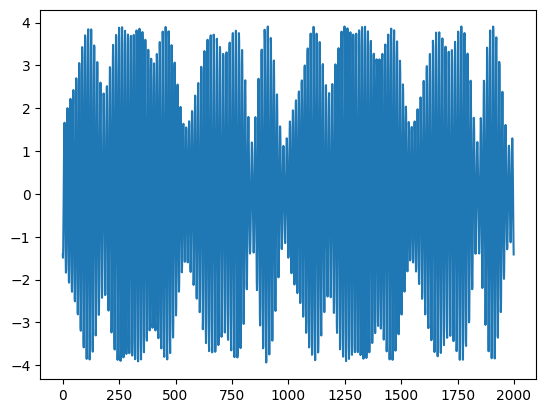

RAP= 1.84 dB


In [14]:
import numpy as np
from scipy import optimize as op

import matplotlib.pyplot as plt
PI=3.14159265
def phi_(x):
    t=np.linspace(0,2,2000)
    f=np.zeros(2000)
    for i in range(10):
        f=f+np.cos(2*3.14159265*(70+i)*t+x[i])
    return np.max(f)

def callback(xk):
    print(xk)


# 初始迭代点
x0 = np.random.rand(10)

bnds = op.Bounds(-PI,PI)

# 最小化优化器，方法：Nelder-Mead、L-BFGS-B、COBYLA...
#res = op.minimize(phi_, x0, method='Nelder-Mead')
#res = op.minimize(phi_, x0, method='L-BFGS-B')
#res = op.minimize(phi_, x0, method='COBYLA')
#res = op.minimize(phi_, x0, method='Powell')
res = op.minimize(phi_, x0, method='SLSQP',bounds=bnds)

#res = op.minimize(phi_, x0, method='trust-constr',bounds=bnds)

print(res.x)
print(phi_(res.x))

fig, ax = plt.subplots()
fig.clear(True)
t=np.linspace(0,2,2000)
f=np.zeros(2000)
for i in range(10):
    f=f+np.cos(2*3.14159265*(70+i)*t+res.x[i])
plt.plot(f)
plt.show()
print('RAP= %.2f dB' %(10*np.log10(np.square(np.max(f))/10)))

phi_opt: [6.0330186  6.13185544 5.84014903 2.77390662 0.8272957  5.04661418
 2.9598446  4.69940886 1.15196637 2.55868935]


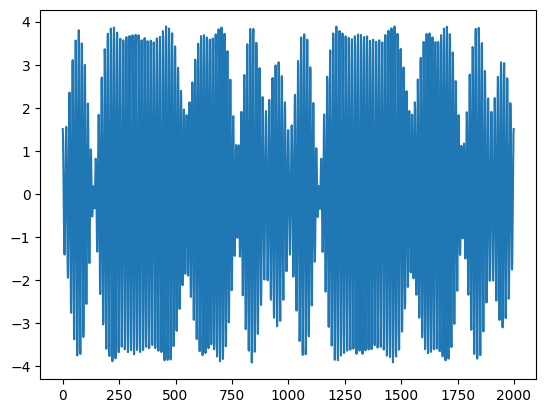

RAP= 1.79 dB


In [10]:
#使用随机搜索算法优化
import numpy as np
import matplotlib.pyplot as plt
PI=3.14159265
def phi_(x):
    t=np.linspace(0,2,2000)
    f=np.zeros(2000)
    for i in range(10):
        f=f+np.cos(2*PI*(70+i)*t+x[i])
    return np.max(f)

N=1000#随机搜索次数
temp=100
for i in range(N):
    phi=np.random.rand(10)*PI*2
    tem=phi_(phi)
    if tem<temp:
        temp=tem
        temp_phi=phi

old_phi=temp_phi
for i in range(N):
    phi=old_phi+np.random.rand(10)*PI-PI/2
    tem=phi_(phi)
    if tem<temp:
        temp=tem
        temp_phi=phi
old_phi=temp_phi
for i in range(1,N//10):
    phi=old_phi+np.random.rand(10)*PI-PI/2
    tem=phi_(phi)
    if tem<temp:
        temp=tem
        temp_phi=phi

old_phi=temp_phi
for i in range(N):
    phi=old_phi+np.random.rand(10)*PI/4-PI/8
    tem=phi_(phi)
    if tem<temp:
        temp=tem
        temp_phi=phi
old_phi=temp_phi
for i in range(1,N//10):
    phi=old_phi+np.random.rand(10)*PI/4-PI/8
    tem=phi_(phi)
    if tem<temp:
        temp=tem
        temp_phi=phi

old_phi=temp_phi
for i in range(N):
    phi=old_phi+np.random.rand(10)*PI/16-PI/32
    tem=phi_(phi)
    if tem<temp:
        temp=tem
        temp_phi=phi
old_phi=temp_phi
for i in range(1,N//10):
    phi=old_phi+np.random.rand(10)*PI/16-PI/32
    tem=phi_(phi)
    if tem<temp:
        temp=tem
        temp_phi=phi

old_phi=temp_phi
for i in range(N):
    phi=old_phi+np.random.rand(10)*PI/64-PI/128
    tem=phi_(phi)
    if tem<temp:
        temp=tem
        temp_phi=phi
old_phi=temp_phi
for i in range(1,N//10):
    phi=old_phi+np.random.rand(10)*PI/64-PI/128
    tem=phi_(phi)
    if tem<temp:
        temp=tem
        temp_phi=phi

phi_opt=temp_phi
print('phi_opt:',phi_opt)
fig, ax = plt.subplots()
fig.clear(True)
t=np.linspace(0,2,2000)
f=np.zeros(2000)
for i in range(10):
    f=f+np.cos(2*PI*(70+i)*t+phi_opt[i])
plt.plot(f)
plt.show()
print('RAP= %.2f dB' %(10*np.log10(np.square(np.max(f))/10)))